# **Algoritmos Não-Supervisionados e k-means**

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Algoritmos não-supervisionados
- 2) K-means
- 3) Exemplo real


## **TOC:**
Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) [Algoritmos não-supervisionados](#nao_supervisionado)
- 2) [K-means](#amostragem)
    - 2.1) [Construindo o modelo](#build_model)
    - 2.2) [Determinando o k](#find_k)
    - 2.3) [Algoritmo](#algorithm)
    - 2.4) [Quando uso algoritmos de clusterização](#use_case)
- 3) [Exemplo real](#real)

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_circles

 ---

## 1) **Algoritmos não-supervisionados** <a class="anchor" id="nao_supervisionado"></a>



Um dos problemas que podem ser resolvidos com Machine Learning é o da __clusterização__!

Este tipo de problema consiste em __agrupar__ itens semelhantes, isto é, criar __grupos__ (ou __clusters__) dos dados que são parecidos entre si.

> O objetivo central é **dividir os dados em grupos distintos**, tais que **membros de cada grupo sejam similares entre si**

Problemas como estes podem aparecer em diversos contextos:

- Identificação de tipos de clientes parecidos, para o direcionamento de marketing;
- Agrupamento de cidades próximas para melhor logística de entrega de produtos;
- Identificação de padrões climáticos;
- Identificação de genes relacionados à determinada doença;
- Identificação de documentos semelhantes em processos legais;

...e qualquer outro problema em que você deseje **AGRUPAR DADOS SIMILARES** ou ainda **ENCONTRAR ALGUMA ESTRUTURA NOS SEUS DADOS!**

Veremos agora um dos principais algoritmos de clusterização, o **k-means**



___

## 2) **K-means**  <a class="anchor" id="k-means"></a>

Documentação: [clique aqui!](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

O k-means é utilizado para a determinação de um número **k de clusters em nossos dados**

O primeiro passo pra aplicar o k-means é:

- Determinar o número k de clusters!

Por exemplo, só de olhar pros dados plotados a seguir, fica fácil de identificar 4 grupos distintos, não é mesmo? 

Ref: [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)


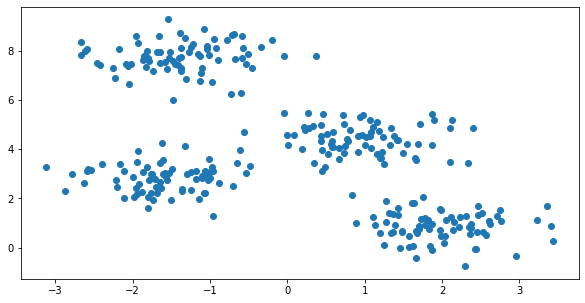

In [2]:
X, y = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=0.60, random_state=0)

fig, axs = plt.subplots(figsize=(10,5))

axs.scatter(X[:,0], X[:,1])
plt.show()


Mas, como o computador pode identificar estes grupos? É isso que o algoritmo responde!

Uma vez determinado o número k de clusters, podemos construir nosso modelo!

Primeiramente, lemos nossos dados e os armazenamos na variável X. Para os dados acima, usamos um dataset do próprio sklearn:

### **2.1) Construindo o modelo** <a class="anchor" id="build_model"></a>

Note que temos apenas as **features** dos dados (no caso, coordenadas x e y). Iso caracteriza um problema de clusterização **não-supervisionado**: quando nossos dados **não têm targets**, apenas features!

In [3]:
from sklearn.cluster import KMeans

Temos vários argumentos na classe, mas os principais são:

- n_clusters: quantos clusters queremos (o número k);
- max_iter: é o número máximos de iterações que o algoritmo fará, se ele não convergir antes disso. É uma boa ideia não colocar um número tão grande, ou o algoritmo pode ficar bem lento. Algo da ordem de 1000, em geral é uma boa escolha.

Por fim, pra fitar o modelo, fazemos:

In [4]:
estimador = KMeans(n_clusters=4, max_iter=1000)

print("parâmetros:", estimador.get_params())

parâmetros: {'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 4, 'n_init': 10, 'n_jobs': 'deprecated', 'precompute_distances': 'deprecated', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


Em algoritmos **não supervisionados**, não existe a divisão em dados de treino e dados de teste, porque **não há o que testar!**. Queremos apenas **econtrar estrutura** nos dados!

Então, basta fitar o modelo com nossos dados todos (no caso, o array X)

In [5]:
modelo = estimador.fit(X)

Agora que o modelo está treinado, podemos fazer predições:


In [6]:
clusters = modelo.predict(X)

Isto retorna uma lista com número de elementos igual ao número de pontos do dataset, e com valores entre 0 e k-1, indicando qual é o número do cluster (a contagem começa com zero). 

No nosso caso, como k = 4, teremos os clusters 0, 1, 2 e 3.

Pra visualizarmos os clusters, podemos fazer:

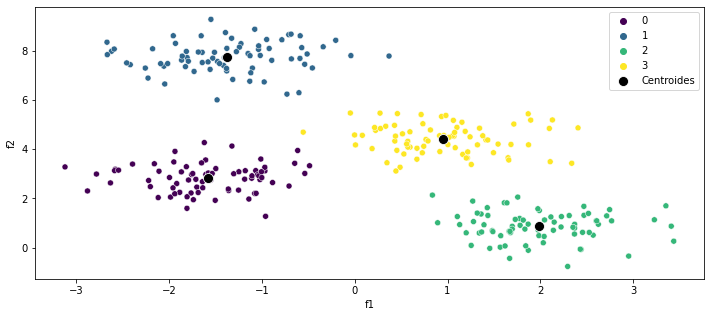

In [7]:
clustered_data = pd.concat([pd.DataFrame(X), pd.Series(clusters)], axis=1)
fig, axs = plt.subplots(figsize=(12,5))

clustered_data.columns = ['f1','f2','cluster']
sns.scatterplot(data = clustered_data, x="f1", y="f2", hue="cluster", palette="viridis", ax = axs)


clusters_centers = pd.DataFrame(modelo.cluster_centers_).rename(columns={0:"f1", 1:"f2"})

sns.scatterplot(data = clusters_centers, x="f1", y="f2", color = "black", s=100, label="Centroides", ax = axs)

plt.show()

_____

### **2.2) - Determinando o k** <a class="anchor" id="find_k"></a>

Mas e se não for tão fácil de plotar os dados para determinar o k?

Pode ser que não consigamos visualizar nossos dados em 2D, se, por exemplo, tivermos mais de 3 features em nossos dados...

Neste caso, podemos usar o __método do cotovelo__, que consiste em rodar o k-means várias vezes, para diferentes valores de k, e depois plotar um gráfico com a **inércia** de cada uma das rodadas. 

A inércia também é chamada de **WCSS** (Within-Cluster-Sum-of-Squares), isto é, "soma de quadrados intra-cluster", que é calculada como a soma das distâncias (ao quadrado) entre os pontos e os centróides dos clusters.

Quanto menor o WCSS, mais eficiente foi a clusterização, **mas até certo ponto!**

Conforme o número de clusters (k) aumenta, o WCSS diminui, sendo mínimo quando cada ponto é seu próprio cluster isolado (o que não é nada útil, pois se cada ponto for um cluster, não há clusterização alguma!).

Assim, o que queremos não é encontrar um k que minimize o WCSS, mas sim um k a partir do qual o WCSS **para de decrescer tão rapidamente!**

Quando encontramos este k, encontramos o número ideal de clusters!

Ao plotarmos o WCSS (inércia) em função de k, o que buscaremos será então o valor de k onde **o gráfico deixa de ser tão inclinado**. Esses pontos são visualizados como "quinas", ou **cotovelos** no gráfico -- e daí vem o nome do método!

Para aplicar o método, fazemos:



O valor de k mais adequado é aquele em que o gráfico tem uma "quina" bem abrupta: no exemplo acima, k = 4, como já sabíamos! 





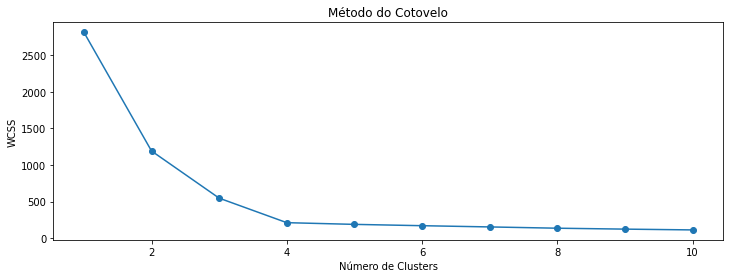

In [8]:
# A inercia é a soma dos quadrados das distâncias dos pontos ao cluster mais próximo, e funciona como uma espécie de erro.
inercia = []

lista_k = range(1, 11)

fig, axs = plt.subplots(figsize=(12,4))

for k in lista_k:
    kmeans = KMeans(n_clusters=k).fit(X)
    inercia.append(kmeans.inertia_)

axs.plot(range(1, 11), inercia)
axs.scatter(range(1, 11), inercia)
axs.set_title('Método do Cotovelo')
axs.set_xlabel('Número de Clusters')
axs.set_ylabel('WCSS')
plt.show()

___

### Vamos fazer o exemplo com mais features

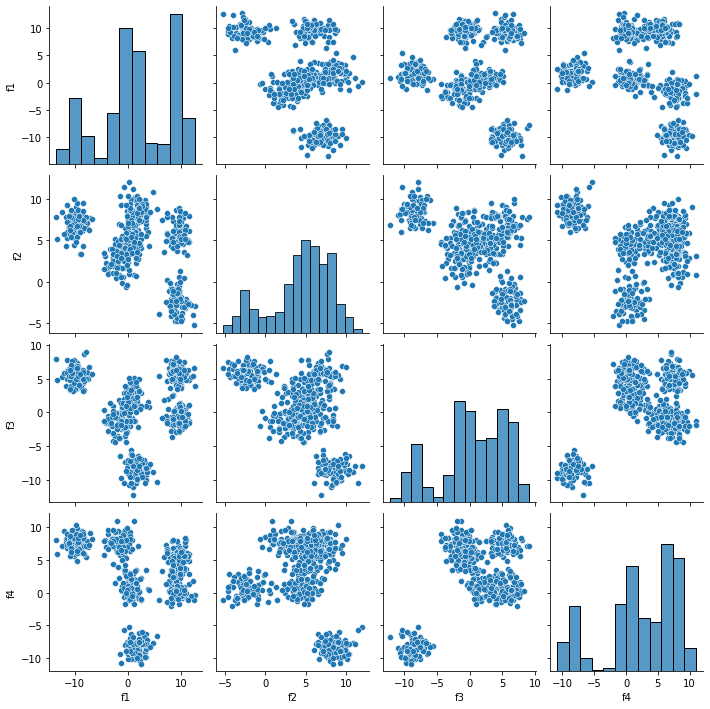

In [9]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, n_features=4, centers=6, cluster_std=1.3, random_state=0)

df = pd.DataFrame(X, columns=["f1", "f2", "f3", "f4"])

sns.pairplot(data=df)
plt.show()

**Aplicando o método do cotovelo...**

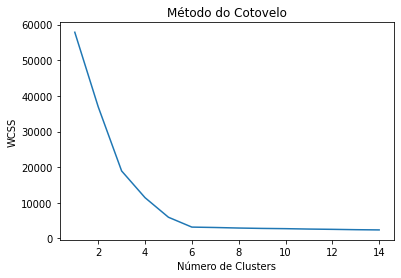

In [10]:
inercia = []

lista_k = range(1, 15)

for k in lista_k:
    
    kmeans = KMeans(n_clusters=k).fit(X)
    
    inercia.append(kmeans.inertia_)

plt.plot(range(1, 15), inercia)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

**Vamos tentar separadamente** $k = 3$ e $k = 6$ 

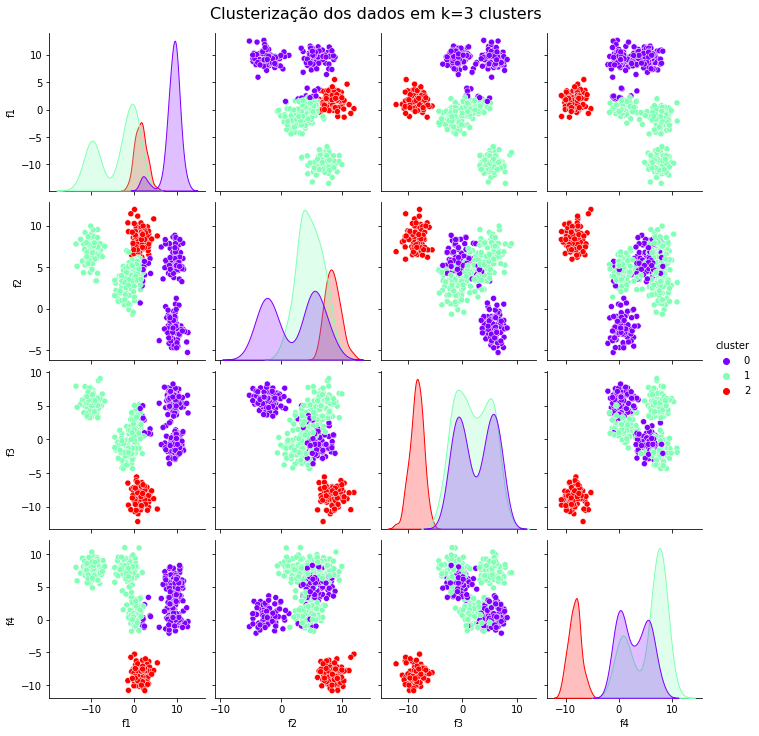

In [11]:
from sklearn.cluster import KMeans

estimador = KMeans(n_clusters=3, max_iter=1000)
modelo = estimador.fit(X)
clusters = modelo.predict(X)

df_final = pd.concat([df, pd.Series(clusters)], axis = 1)
df_final.columns = df.columns.tolist() + ["cluster"]

g = sns.pairplot(df_final, hue="cluster", palette="rainbow")
g.fig.suptitle("Clusterização dos dados em k=3 clusters", y=1.02, size=16)
plt.show()

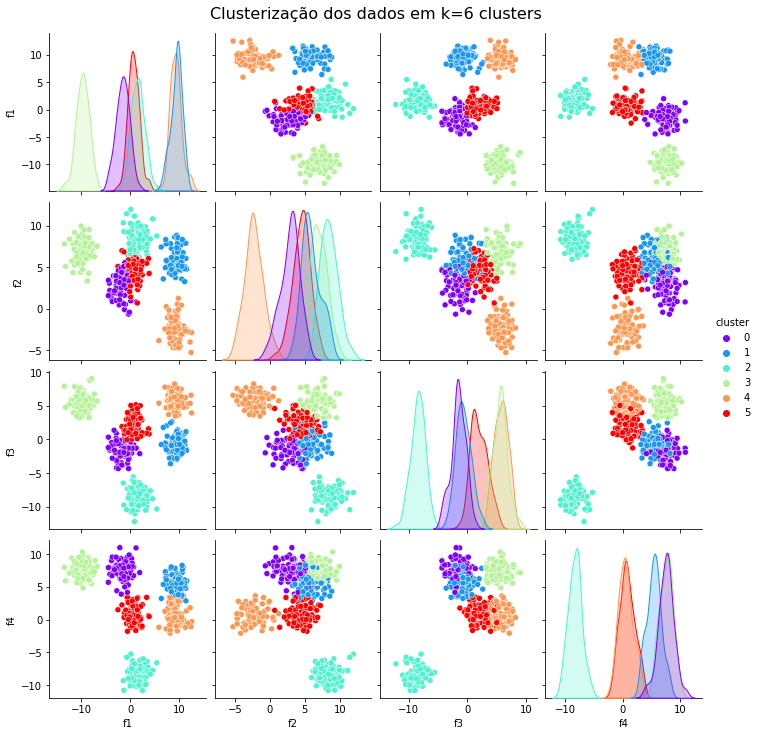

In [12]:
from sklearn.cluster import KMeans

estimador = KMeans(n_clusters=6, max_iter=1000)
modelo = estimador.fit(X)
clusters = modelo.predict(X)

df_final = pd.concat([df, pd.Series(clusters)], axis = 1)
df_final.columns = df.columns.tolist() + ["cluster"]

g = sns.pairplot(df_final, hue="cluster", palette="rainbow")
g.fig.suptitle("Clusterização dos dados em k=6 clusters", y=1.02, size=16)
plt.show()

As projeções em duas dimensões mostram que $k=6$ de fato é a melhor escolha! (O que faz sentido, pois nossos dados artificiais foram preparados para conter 6 clusters!)

____

### **2.3) Algoritmo** <a class="anchor" id="algorithm"></a>

Uma vez escolhido o número de clusters, o k-means segue as seguintes etapas:

- 1) k pontos são escolhidos aleatoriamente como sendo os centroides dos clusters (centroide é o centro do cluster);

- 2) Para cada ponto, vamos calcular qual é a distância entre ele e os k centroides. Aquele centroide que estiver mais perto, será o cluster ao qual este ponto pertencerá. Fazemos isso para todos os pontos!

- 3) Ao fim do passo 2, teremos k clusters, cada um com seu centroide, e todos os pontos pertencerão a determinado cluster!

- 4) Uma vez que temos os clusters, calculamos qual é de fato o centro de cada um deles. Isso é feito tomando a média da posição de todos os pontos;

- 5) Após determinar os novos k centroides, repetimos o processo!

- 6) E o processo se repete até que os centroides não mudem mais. Quando esta convergência for alcançada (ou após o número determinado de iterações), o algoritmo termina!

<center><img src="https://stanford.edu/~cpiech/cs221/img/kmeansViz.png" width=700></center>

<center><img src="https://miro.medium.com/max/1280/1*rwYaxuY-jeiVXH0fyqC_oA.gif" width=500></center>

<center><img src="https://miro.medium.com/max/670/1*JUm9BrH21dEiGpHg76AImw.gif" width=500></center>

_____

### **2.4) Quando uso algoritmos de clusterização** <a class="anchor" id="use_case"></a>


De certa fora, algoritmos de clusterização podem ser vistos como classificadores, uma vez que os clusters podem caracterizar um grupo, ou uma classe.

No entanto, há uma diferença bem importante entre problemas de classificação e clusterização:

- **Problemas de classificação** em geral são **supervisionados**, isto é, os dados que utilizamos têm tanto as features como os **targets**. Em outras palavras, neste tipo de problema, sabemos de antemão quais são as classes de interesse!

- **Problemas de clusterização**, por outro lado, são **não-supervisionados**. ou seja, os dados **não têm** targets, temos apenas as features! O nosso objetivo é justamente descobrir **alguma estrutura de agrupamento** nos dados, mas sem qualquer informação prévia quanto aos grupos a serem formados.

Foi exatamente o caso do nosso exemplo: nós tínhamos apenas as **features** dos dados (f1, f2, etc), e **nenhuma** informação quanto aos grupos que seriam formados.

Foi só depois que fizemos a análise exploratória dos dados (plot), que pudemos identificar alguma estrutura (4 clusters), para então aplicar o k-means!

No segundo caso, só pudemos determinar o número de clusters de forma segura utilizando o **método do cotovelo**.

Assim sendo, via de regra, a utilização ou não de algoritmos de clusterização, além do tipo de problema, depende dos **dados disponíveis**:

- Se os dados são previamente classificados (temos **features e targets**), a melhor estratégia é usar **algoritmos de classificação** (regressão logística, árvores, SVM, etc.);

- Mas, se os dados não são previamente classificados (temos **apenas as features**), a melhor estratégia é usar **algoritmos de clusterização** (k-means, [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), [hierarchical clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering), etc.)


### **2.5 Diferentes algoritmos de clusterização**

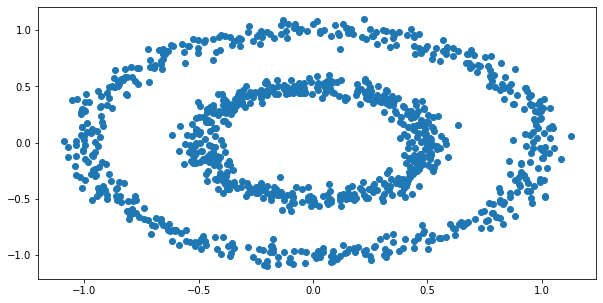

In [13]:
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.05)
fig, axs = plt.subplots(figsize=(10,5))

axs.scatter(X[:,0], X[:,1])
plt.show()

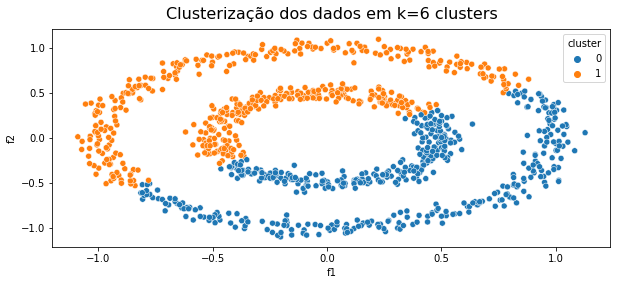

In [14]:
from sklearn.cluster import KMeans

estimador = KMeans(n_clusters=2, max_iter=1000)
modelo = estimador.fit(X)
clusters = modelo.predict(X)

df = pd.DataFrame(X, columns = ["f1", "f2"])

df_final = pd.concat([df, pd.Series(clusters)], axis = 1)
df_final.columns = df.columns.tolist() + ["cluster"]

fig, axs = plt.subplots(figsize=(10,4))

g = sns.scatterplot(data=df_final,x="f1",y="f2", hue="cluster")
g.set_title("Clusterização dos dados em k=6 clusters", y=1.02, size=16)
plt.show()

Ref: [Sobre clusterização](https://scikit-learn.org/stable/modules/clustering.html)

____

## 3) **Exemplo real** <a class="anchor" id="real"></a>

Vamos agora a um exemplo real de um problema de clusterização onde podemos usar o k-means?

Usaremos [dados sobre faculdades americanas](https://www.kaggle.com/flyingwombat/us-news-and-world-reports-college-data?select=College.csv)

Os dados são referentes ao ano de 1995, e contêm as seguintes variáveis:

- Apps: número de aplicações (inscrições para processo seletivo) recebidas

- Accept: número de aplicações aceitas

- Enroll: número de novos alunos admitidos naquele ano

- Top10perc: porcentagem de novos alunos que vieram das top 10% melhores escolas de ensino médio

- Top25perc: porcentagem de novos alunos que vieram das top 25% melhores escolas de ensino médio

- F.Undergrad: número de alunos de graduação que estudam em período integral

- P.Undergrad: número de alunos de graduação que estudam meio período

- Outstate: valor da anual da faculdade para alunos fora do estado

- Room.Board: custos anuais de aluguel

- Books: gasto estimado com livros

- Personal: gastos pessoais de custo de vida

- PhD: porcentagem do corpo docente com doutorado

- Terminal: porcentagem do corpo docente com o maior grau de escolaridade possível

- S.F.Ratio: razão de número de estudantes/corpo docente

- perc.alumni: porcentagem de ex-alunos que doaram dinheiro para a universidade

- Expend: gastos institucionais com os estudantes

- Grad.Rate: taxa de graduação


Obs.: originalmente, a base é **supervisionada**, com o target "Private" que indica se a faculdade é pública ou privada. Mas, como estamos estudando problemas não-supervisionados, eu modifiquei a base para não conter esta label.


Vamos explorar os dados para ver se encontramos alguma estrutura neles?

In [15]:
df = pd.read_csv('data/college.csv')

In [16]:
df.head()

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [18]:
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [19]:
# notou algo de estranho?
# vamos corrigir!
df.loc[df["PhD"] == 103, "PhD"] = 100
df.loc[df['Grad.Rate'] == 118, 'Grad.Rate'] = 18

In [20]:
# confira que as correções foram feitas
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.656371   79.702703   14.089704    22.743887   
std     677.071454   16.321324   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  100.000000  100.000000   39.800000    64.000000   

             Expend   Grad.Rate  
count    777.000000  777.000000  
mean    9660.171171   65.334620  
std     5221.768440   17.158186  
min     3186.000000   10.000000  
25%     6751.000000   53.000000  
50%     8377.000000   65.000000  
75%    10830.000000   78.000000  
max    56233.000000  100.000000

Agora é sua vez!

Lembre de tudo o que vimos no primeiro mês de curso, e **explore os dados**!

Fça quantos gráficos você quiser, formule e responda quantas perguntas vc quiser!

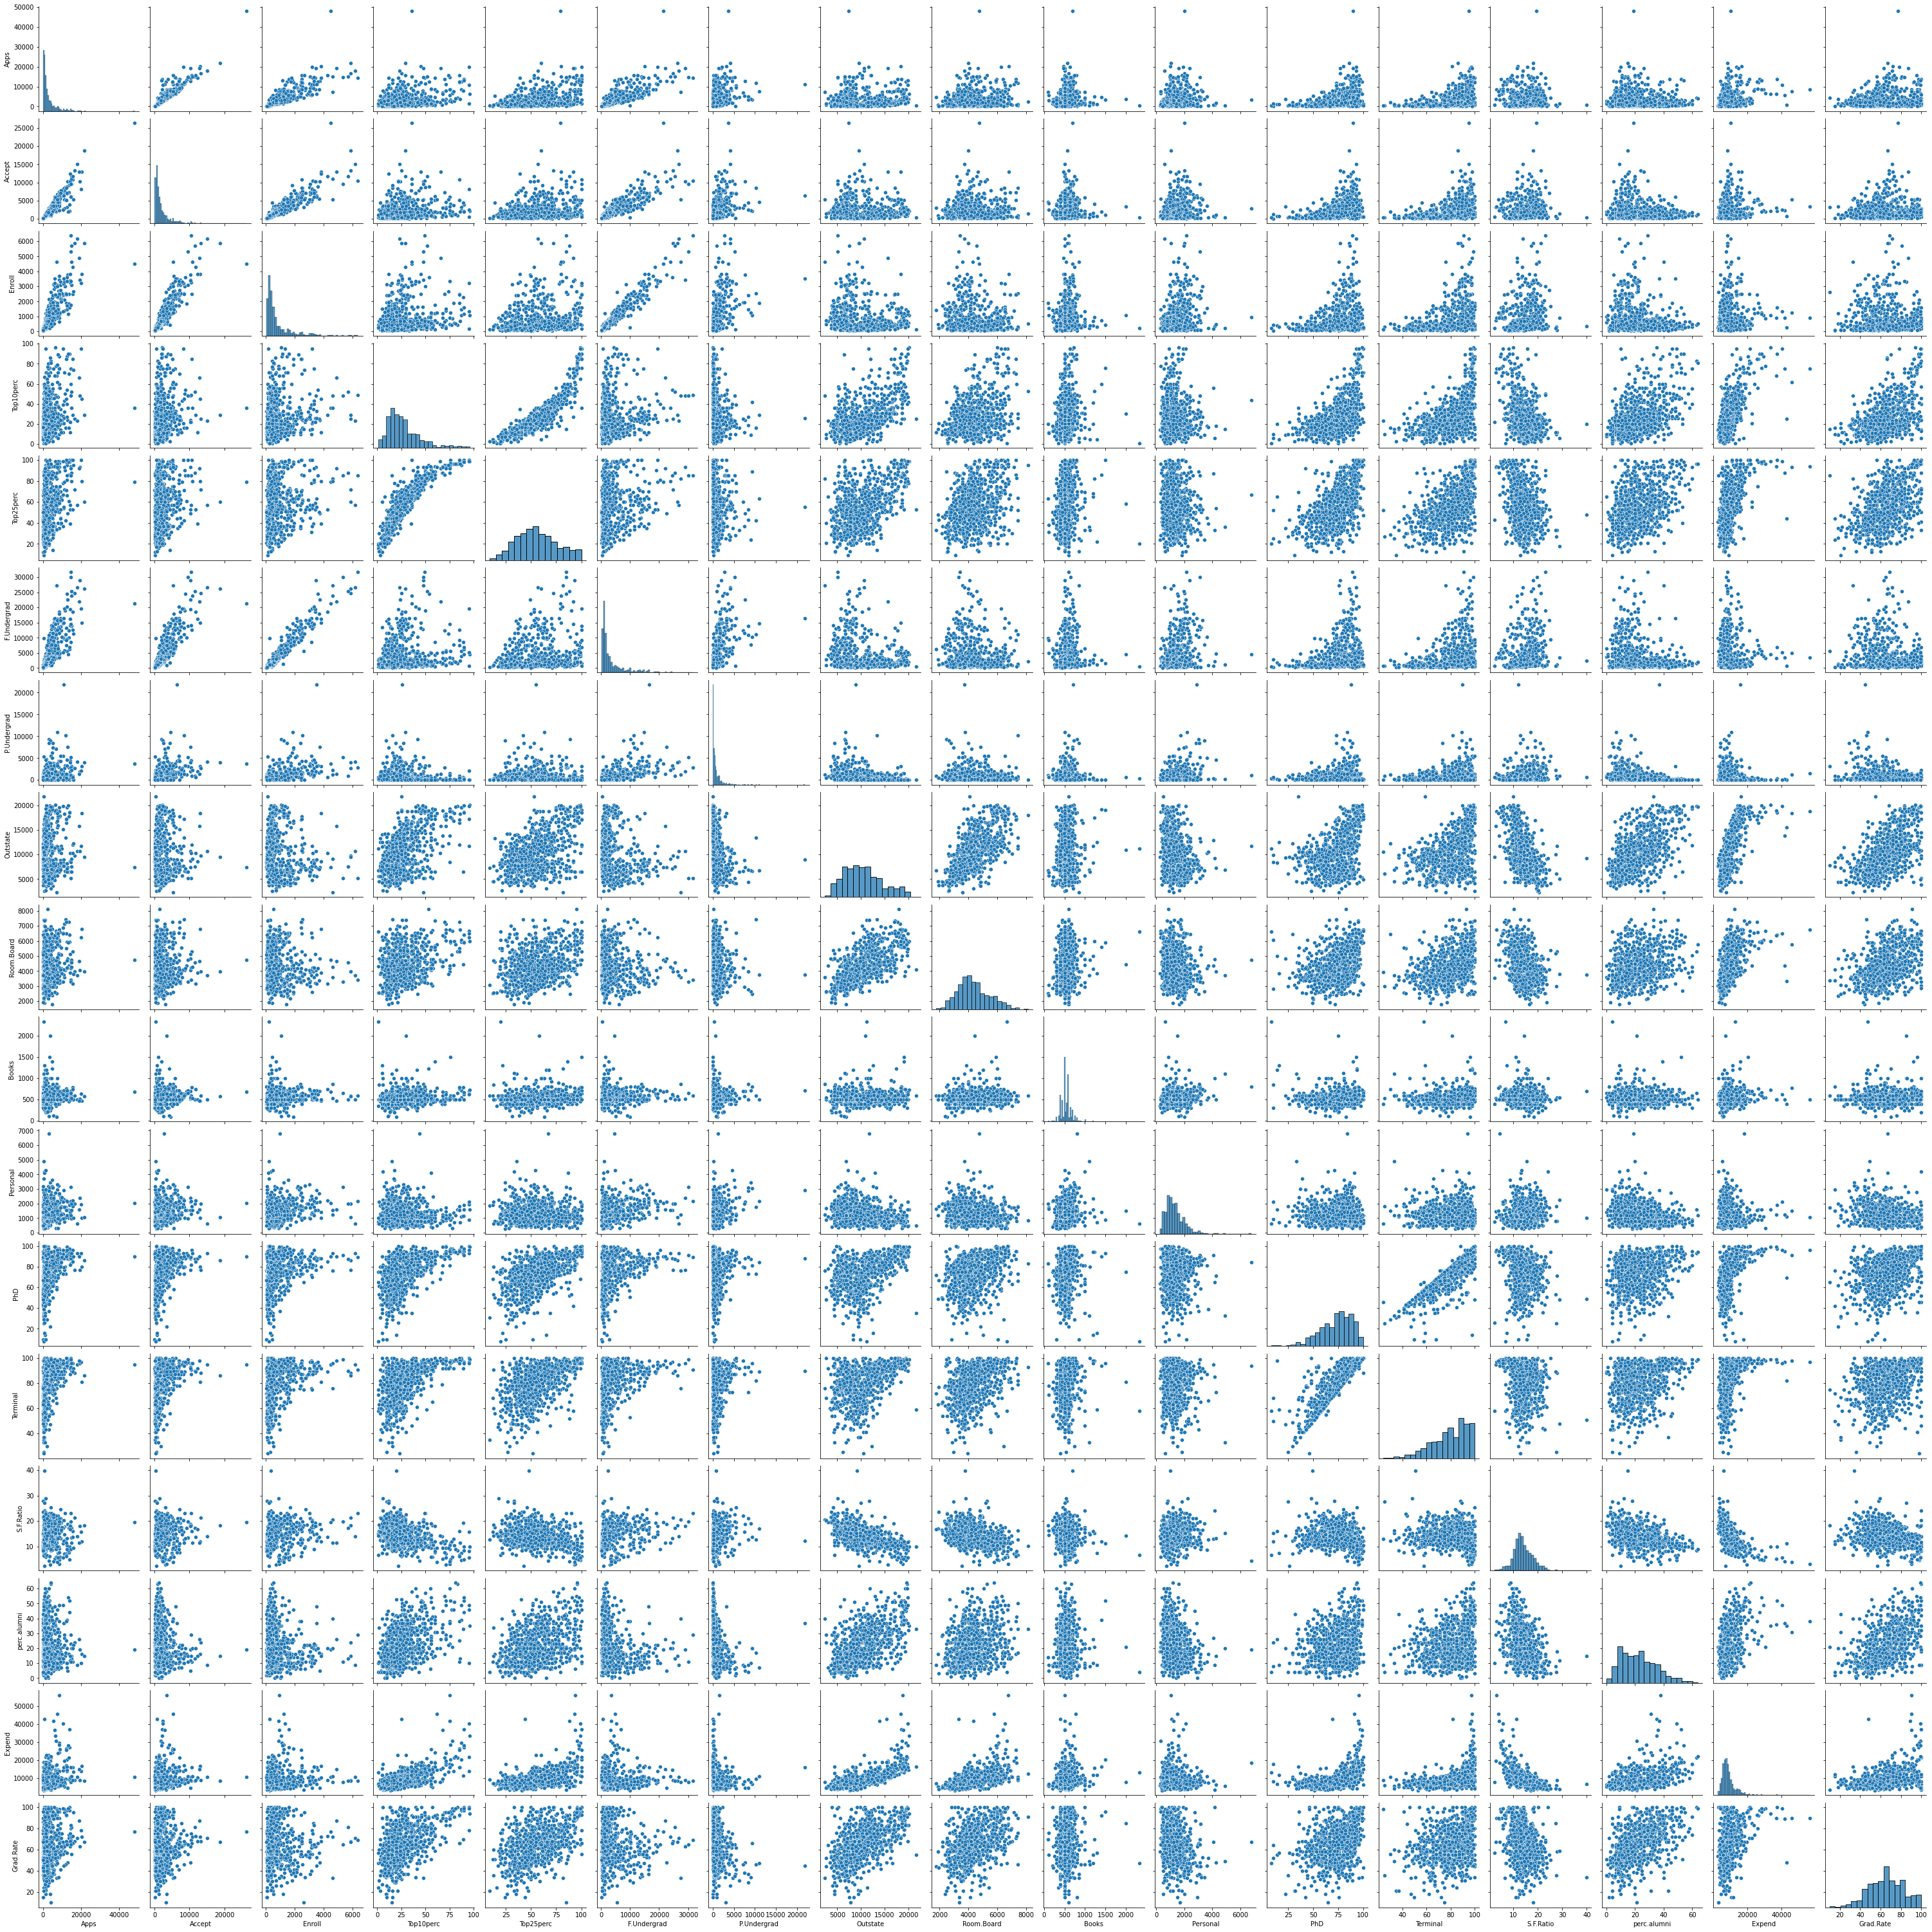

In [21]:
# vamos dar uma olhada no pairplot? (pode ser que demore bastante...)
sns.pairplot(df)

Não é muito óbvio, de imediato, que existem dois grupos distintos, né?

Mas vamos treinar nosso algoritmo para vermos se é possível encontrar alguma estrutura quando todas as features são consideradas juntas!

In [22]:
# treinando o k-means com k=2

from sklearn.cluster import KMeans

X = df.select_dtypes(np.number)

estimador = KMeans(n_clusters=2, max_iter=1000)
modelo = estimador.fit(X)
clusters = modelo.predict(X)

df_final = pd.concat([df, pd.Series(clusters,name="cluster")], axis = 1)

Agora que nosso modelo foi criado, será que ganhamos algum novo insight olhando pro pairplot?

In [23]:
df_final[df_final["cluster"]==1].describe().T.iloc[:5]

count         mean          std   min    25%     50%     75%  \
Apps       669.0  1813.234679  1565.717966  81.0  668.0  1262.0  2425.0   
Accept     669.0  1287.165919  1009.001208  72.0  544.0   956.0  1730.0   
Enroll     669.0   491.044843   400.227605  35.0  222.0   366.0   611.0   
Top10perc  669.0    25.309417    15.130122   1.0   15.0    22.0    33.0   
Top25perc  669.0    53.470852    18.873225   9.0   40.0    52.0    66.0   

              max  
Apps       8598.0  
Accept     5526.0  
Enroll     3147.0  
Top10perc    95.0  
Top25perc   100.0

In [24]:
df_final[df_final["cluster"]==0].describe().T.iloc[:5]

count          mean          std    min      25%     50%       75%  \
Apps       108.0  10363.138889  5458.567270  713.0  7265.25  8966.5  12764.00   
Accept     108.0   6550.898148  3624.524925  661.0  4478.50  5771.0   7760.25   
Enroll     108.0   2569.722222  1227.331227  252.0  1705.50  2404.0   3206.75   
Top10perc  108.0     41.490741    24.496994    5.0    24.00    32.0     57.00   
Top25perc  108.0     70.203704    19.429604   33.0    56.50    66.5     89.25   

               max  
Apps       48094.0  
Accept     26330.0  
Enroll      6392.0  
Top10perc     96.0  
Top25perc    100.0

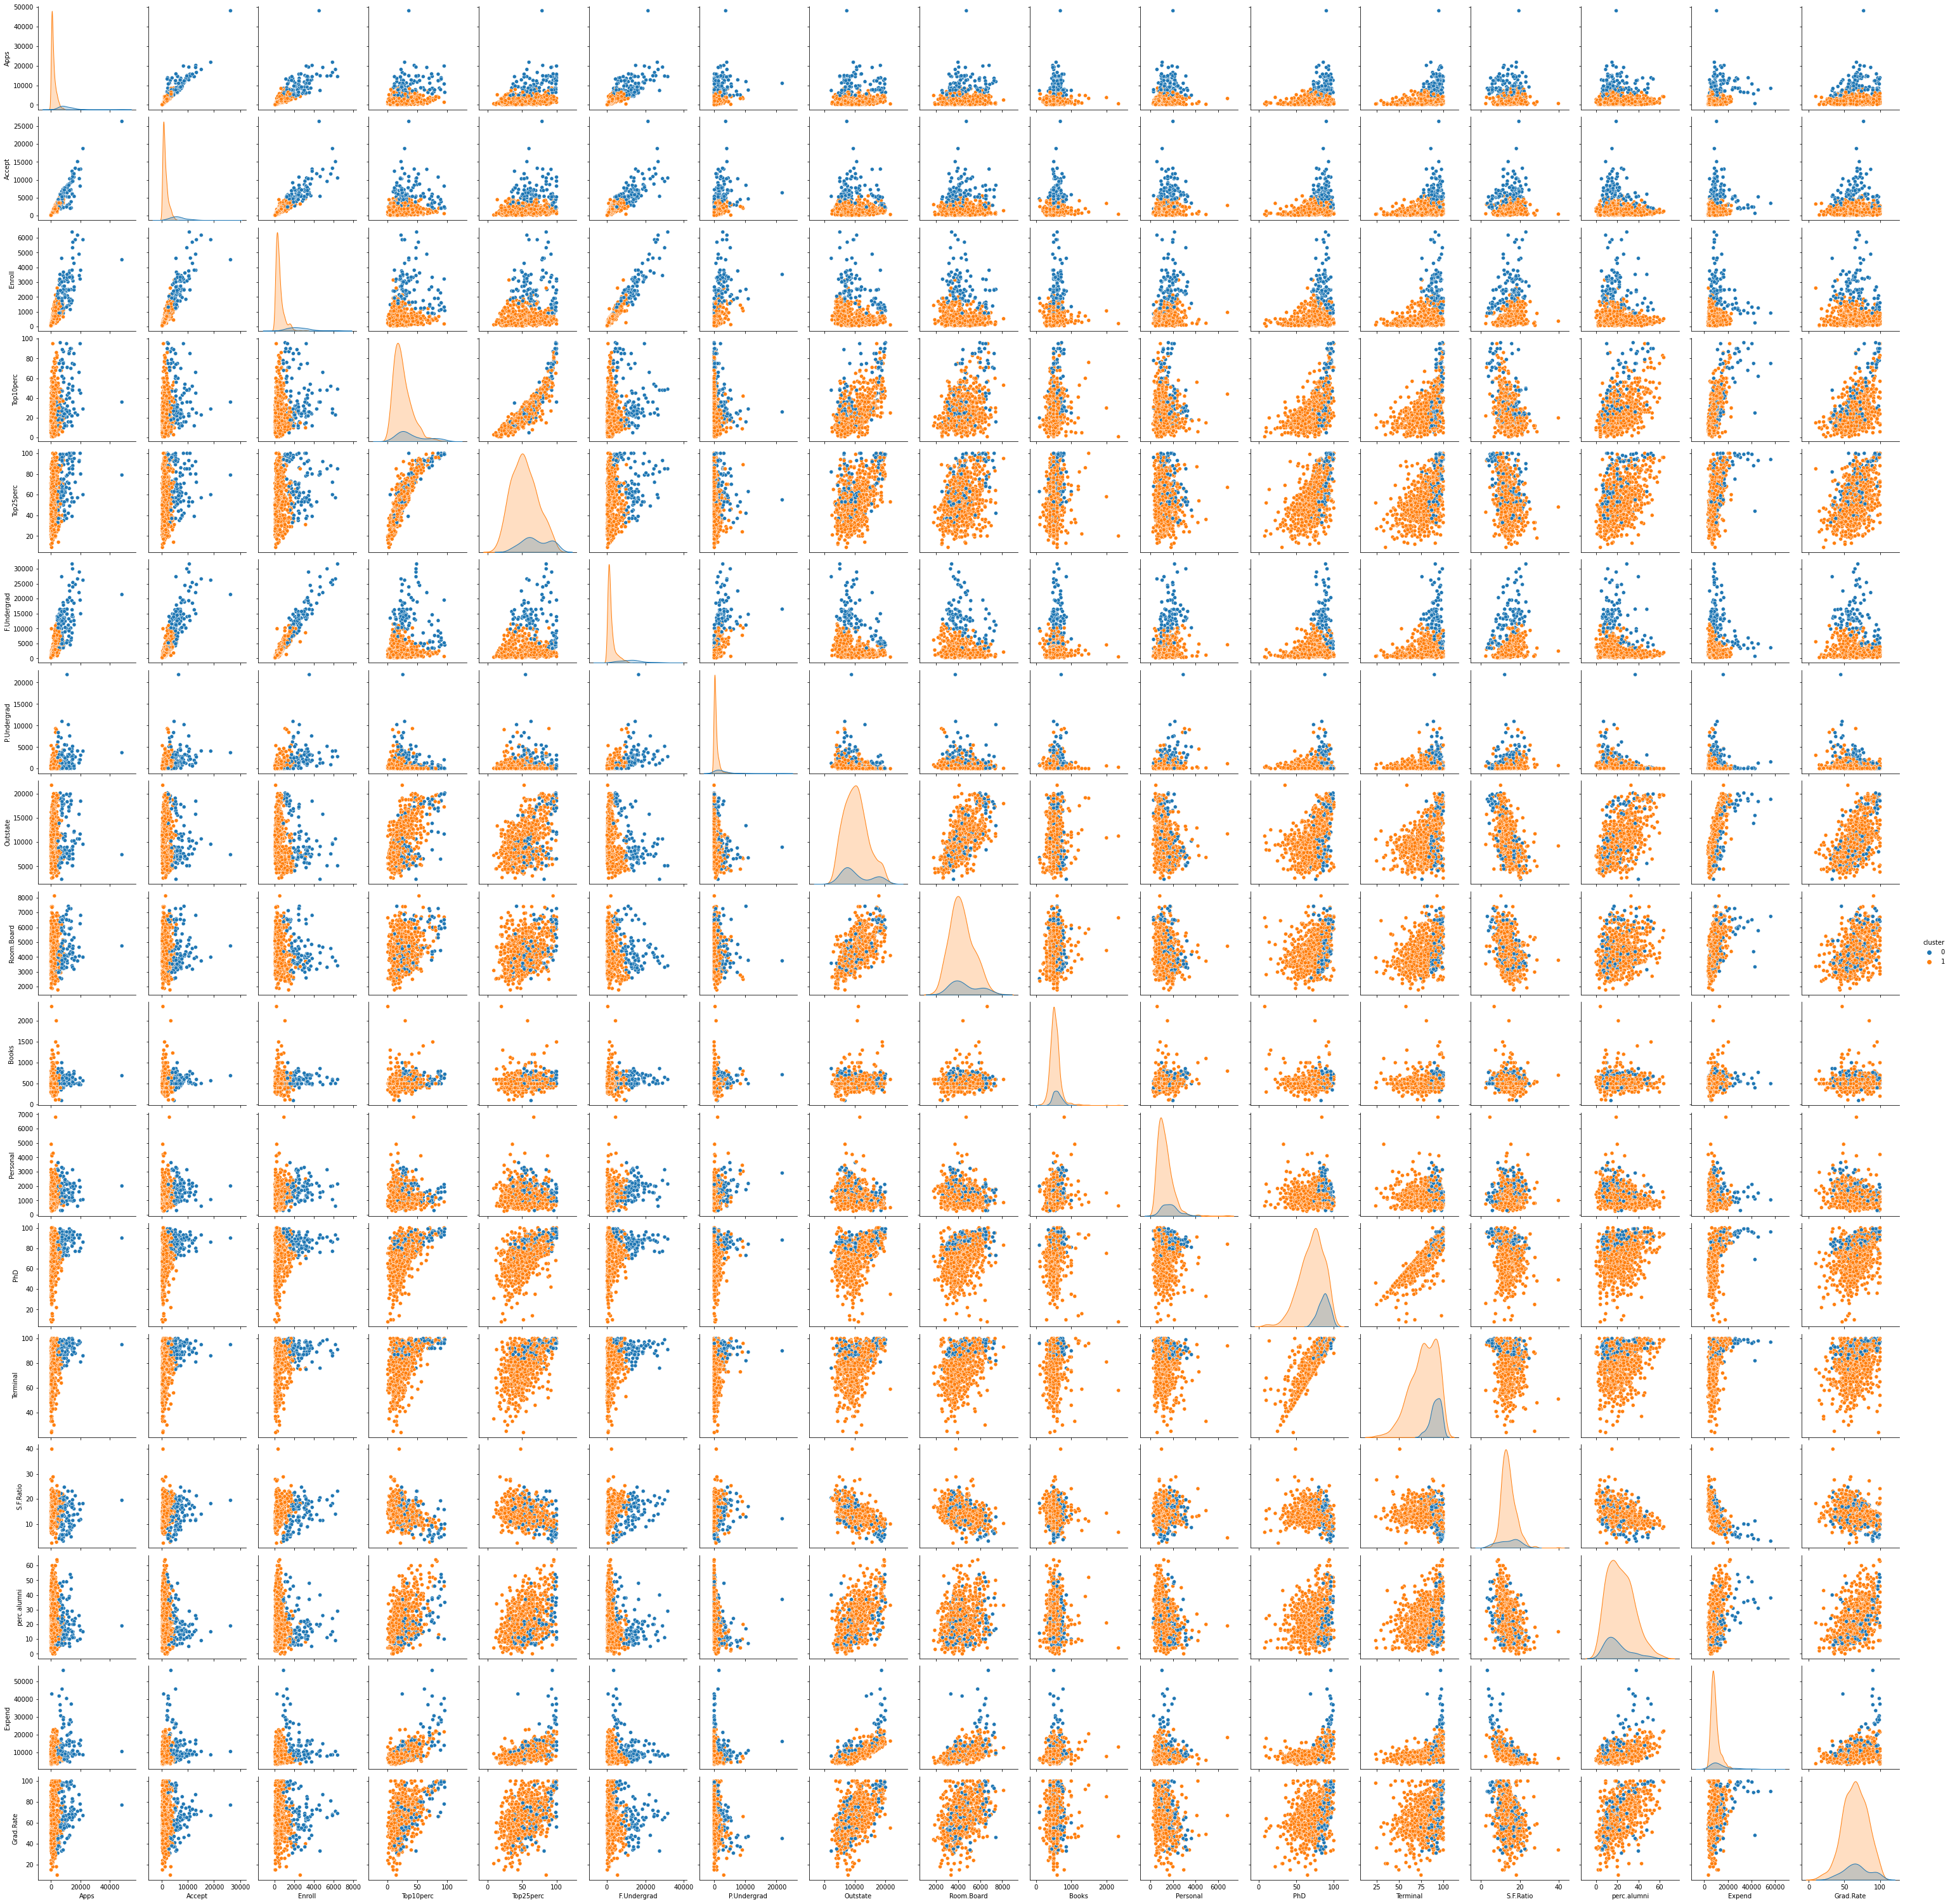

In [25]:
# pair plot com hue
sns.pairplot(df_final, hue="cluster")
plt.show()

____